In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

Welcome to JupyROOT 6.30/04


In [2]:
FILE_PATH = "../Dati/Run_Na_invertito_trigger512_Data_5_22_2024_Ascii_0000.root" #Relative file path
file1 = uproot.open(FILE_PATH)
FILE_PATH = "../Dati/Run_Na_invertito_trigger512_Data_5_22_2024_Ascii_0001.root"
file2 = uproot.open(FILE_PATH)

In [3]:
baselines = np.concatenate( (file1["tree"]["base"].array()[:-1], file2["tree"]["base"].array()[1:]) , axis=0 ) 
charges = np.concatenate( (file1["tree"]["charge"].array()[:-1], file2["tree"]["charge"].array()[1:]), axis=0 )
amp = np.concatenate( (file1["tree"]["amp"].array()[:-1], file2["tree"]["amp"].array()[1:] ), axis=0 )
lead_edge = np.concatenate( (file1["tree"]["letime"].array()[:-1], file2["tree"]["letime"].array()[1:]), axis=0 )
t_edge = np.concatenate( (file1["tree"]["tetime"].array()[:-1], file2["tree"]["tetime"].array()[1:]), axis=0 )
channel= np.concatenate( (file1["tree"]["ch"].array()[:-1], file2["tree"]["ch"].array()[1:]), axis=0 )
waveform = np.concatenate( (file1["tree"]["pshape"].array()[:-1], file2["tree"]["pshape"].array()[1:] ), axis=0 )

[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [4]:
N_ev=len(charges[:, 0])
print(N_ev)
nch=file1["tree"]["ch"].array()
print(nch)


91
2597


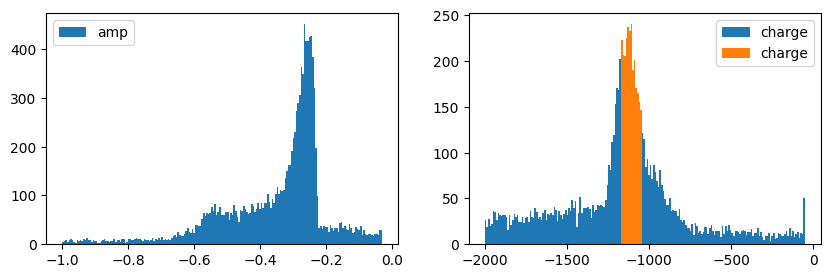

In [5]:
channel=15
bins = 200

#right = [8,14,7,7,14,8,8,8,8,0,7,10]
right=  [14,8,7,7,8,14,8,8,0,8, 10,7]
#left = [6,14,5,6,5,3,4,5,5,0,6,4]
left = [14,6,6,5,3,5,5,4,0,5,4,6]
#right = np.repeat(20,12)
#left = np.repeat(20,12)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
a=plt.hist(amp[:, channel-4], bins=bins, range=(-1, -0.03), label='amp')
plt.legend()
plt.subplot(1,2,2)
b=plt.hist(charges[:, channel-4], bins=bins, range=(-2000, -50), label='charge')


print(np.argmax(b[0]))
idx=np.argmax(b[0])
mask=np.where( (charges[:,channel-4]>b[1][idx-left[channel-4]]) &( charges[:, channel-4]<b[1][idx+right[channel-4]]))[0]
print(len(mask))

b1=plt.hist(charges[:, channel-4][mask], bins=bins, range=(-2000, -50), label='charge')
plt.legend()



In [43]:
plt.plot()

In [47]:
limL=np.zeros(16)
limR=np.zeros(16)
for channel in range(4,16):
    try:
        b=np.histogram(charges[:, channel-4], bins=bins, range=(-2000, -50))
        idx=np.argmax(b[0])
        limL[channel]=b[1][idx-left[channel-4]]
        limR[channel]=b[1][idx+right[channel-4]]

    except IndexError:
        limL[channel]=b[1][idx]
        limR[channel]=b[1][idx+1]
        continue

canale=[4,5,6,7,8,9,10,11,12,13,14,15]
coppia=np.array([ [4,5], [6,7], [8,9], [10,11],[12,13], [14,15] ])
#coppia=np.array([[4,5]])
firstch = coppia[:,0]
secondch = coppia[:,1]

map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print("mappa:",map)

firstch_limits=[ [limL[coppia[i][0]], limR[coppia[i][0]]] for i in range(len(coppia))]
secondch_limits=[[limL[coppia[i][1]], limR[coppia[i][1]]] for i in range(len(coppia))]

print("Primo limite:",firstch_limits)
print("Secondo limite:",secondch_limits)

mappa: [-1 -1 -1 -1  0  1  2  3  4  5  6  7  8  9 10 11]
Primo limite: [[-1405.25, -1132.25], [-1278.5, -1151.75], [-576.5, -469.25], [-752.0, -625.25], [-2000.0, -2000.0], [-1610.0, -1473.5]]
Secondo limite: [[-781.25, -644.75], [-888.5, -771.5], [-1005.5, -820.25], [-488.75, -371.75], [-69.5, -59.75], [-1171.25, -1044.5]]


In [48]:
paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []


paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1, channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])

#import gc
#del waveform100
#gc.collect()
whichpair = np.array(whichpair)



6023


(array([1368.,    0.,  724.,    0., 1980.,    0.,  909.,    0.,  583.,
         459.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

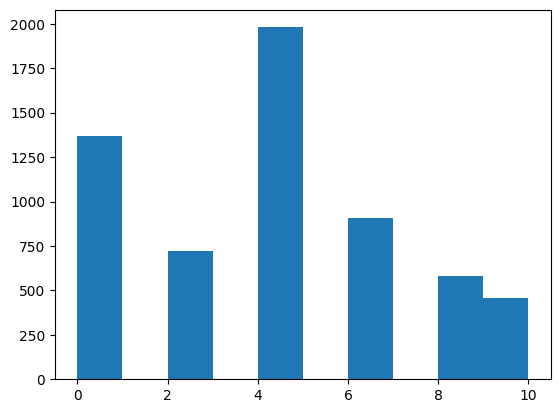

In [49]:
print(len(paired_amp_1))
plt.hist(whichpair)


n = 8, 	 thr = -0.2	
coppia [ 4 5 ]: 2.851658540967086 3.380958418544495
coppia [ 6 7 ]: 2.9337831294067414 2.615156489193419
coppia [ 8 9 ]: 3.385203991205161 1.750746830423997
coppia [ 10 11 ]: 2.9096787743717134 -2.08233055898752
coppia [ 14 15 ]: 2.929859179780408 3.1311687568467494


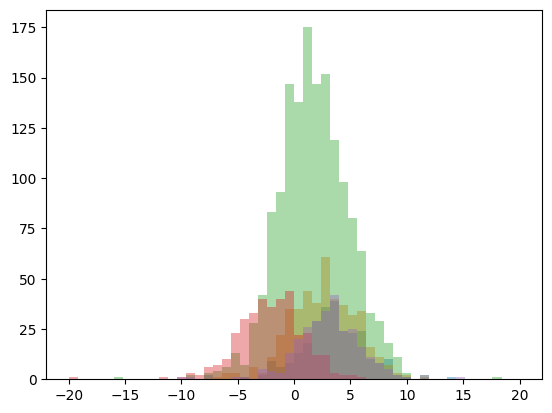

In [101]:
i = 0
j = 0
sampling=1.875
shiftR=8
shiftL=2
#mean = [7,8,9,10]
#tresh = [-0.12,-0.11,-0.10,-0.09]
mean=[8]
tresh=[-0.20]
stds = np.zeros([len(mean), len(tresh),4])

for n in mean:
    for thr in tresh:
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledge= np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            #ledges1[evt]=np.interp(threshold,  [new_wf_1[evt][ledge-shift], new_wf_1[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_1[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges1[evt] = np.poly1d(coef)(threshold) 
            ledge = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]
            #ledges2[evt]=np.interp(threshold,  [new_wf_2[evt][ledge-shift], new_wf_2[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_2[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges2[evt] = np.poly1d(coef)(threshold)
        

        timeres=ledges1-ledges2
        for select in [0, 2, 4, 6, 10]:
            std = []
            mask=np.where((np.abs(timeres*sampling) < 30)&(whichpair==select))[0]
            plt.hist(timeres[mask]*sampling, bins=50, range=(-20,20),alpha=0.4)
            print("coppia [",select+4, select+5,"]:", np.std(sampling*timeres[mask]), np.mean(sampling*timeres[mask]))
            std.append(np.std(sampling*timeres[mask]))
        stds[i][j] = std
        j += 1
    j = 0
    i += 1


#4.1669487180823195evt = 5

In [104]:
coppia [ 4 5 ]: 3.393261202748157 -3.235944663325697
coppia [ 6 7 ]: 2.9567535119924653 -2.4601729003574317
coppia [ 8 9 ]: 3.3338540526211076 -1.8920056851600038
coppia [ 10 11 ]: 2.8772929428303313 1.816683658720582
coppia [ 14 15 ]: 2.714846666672362 -2.835637654703014

coppia [ 4 5 ]: 6.9179525 -2.1585374
coppia [ 6 7 ]: 7.4586387 0.46286175
coppia [ 8 9 ]: 9.000173 -4.4304943
coppia [ 10 11 ]: 5.3801003 0.6107854
coppia [ 14 15 ]: 5.6861076 -2.470925


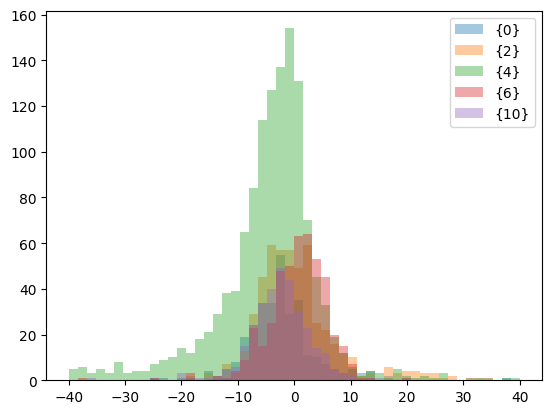

In [70]:
  for select in [0, 2, 4, 6, 10]:
            std = []
            letimes=np.array(paired_letime_1)-np.array(paired_letime_2)
            mask=np.where((np.abs(letimes) < 40)&(whichpair==select))[0]
            plt.hist(letimes[mask], bins=50, range=(-40,40),alpha=0.4, label={select})
            print("coppia [",select+4, select+5,"]:", np.std(letimes[mask]), np.mean(letimes[mask]))
            std.append(np.std(letimes[mask]))
plt.legend()